# Welcome to MNIST Classification

### Import all dependencies

In [1]:
pip install pydot==1.3.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz==0.10.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras import callbacks

### Import Training data

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

5


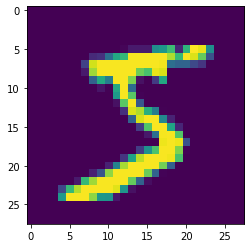

In [6]:
np.set_printoptions(linewidth=200)
plt.imshow(gambar_latih[0])
print(label_latih[0])

### Preprocessing

#### Normalization

In [7]:
gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

To Avoid Error ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float)

In [8]:
gambar_latih, gambar_testing, label_latih, label_testing = gambar_latih.astype('float64'), gambar_testing.astype('float64'), label_latih.astype('float64'), label_testing.astype('float64')

### Create the model

1. 2 Layer with 128 unit and 10 unit of output
2. Flatten input into 28x28 array
3. Softmax turn logit into probability
4. Relu to create linear activation

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

##### Create the loss and optimizer function

1. Adam Optimizer => replacement optimization algorithm for stochastic gradient descent 
2. binary cross entropy as loss function => used for multi-class classification
3. metrics to benchmark is accuracy

In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


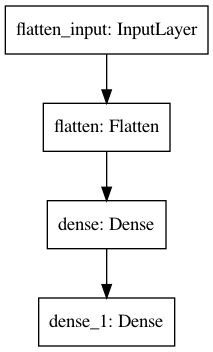

In [12]:
plot_model(model, to_file='05-mnist-classification.png')

### Create Callback

In [13]:
class myCallback(callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nYour Accuracy >90%!")
      self.model.stop_training = True

In [14]:
callbacks = myCallback()

### Fit the model and Save the History

In [15]:
hist = model.fit(gambar_latih, label_latih, epochs=20, callbacks=[callbacks])

Epoch 1/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.2578 - accuracy: 0.9270
Your Accuracy >90%!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2577 - accuracy: 0.9270


### Test Model

In [16]:
model.evaluate(gambar_testing, label_testing)

313/313 [==============================] - 0s 1ms/step - loss: 0.1390 - accuracy: 0.9594


[0.13901248574256897, 0.9593999981880188]

### Plotting

In [17]:
import matplotlib.pyplot as plt

#### Plot Model Loss

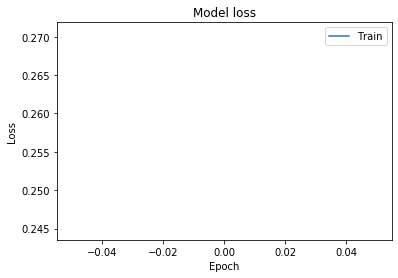

In [18]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

#### Plot Model Accuracy

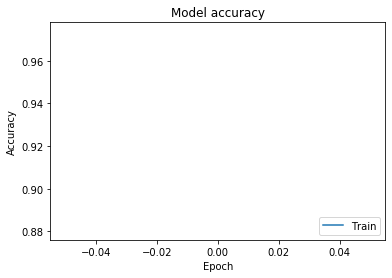

In [19]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()